```
@作者: 阿凯爱玩机器人
@QQ: 244561792
@微信: xingshunkai
@邮箱: xingshunkai@qq.com
@网址: deepsenserobot.com
@B站: "阿凯爱玩机器人"
```

## 导入依赖 

In [1]:
# - 矩阵运算
import numpy as np
# - 图像处理
import cv2 
# - 绘图可视化
from matplotlib import pyplot as plt

# 从阿凯机器人工具箱导入Gemini335类
from kyle_robot_toolbox.camera import Gemini335

pybullet build time: Jun  3 2022 02:05:55


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[INFO][pyorbbecsdk]添加动态链接库检索路径
/usr/local/lib/python3.10/dist-packages/kyle_robot_toolbox/lib/pyorbbecsdk/linux
[INFO][pyorbbecsdk]添加动态链接库检索路径
/usr/local/lib/python3.10/dist-packages/kyle_robot_toolbox/lib/pyorbbecsdk/linux


In [2]:
%matplotlib inline

## 相机初始化

In [2]:
# 创建相机对象
camera = Gemini335()

[05/29 12:51:24.516358][info][13242][Context.cpp:68] Context created with config: default config!
[05/29 12:51:24.516375][info][13242][Context.cpp:73] Work directory=/home/kyle/Project/奥比中光3D相机/deepsense-gemini335/04.Gemini335-3D相机案例源码/basic-example, SDK version=v1.10.5-20240511-7dc8be9
[05/29 12:51:24.516391][info][13242][LinuxPal.cpp:31] createObPal: create LinuxPal!
[05/29 12:51:24.518468][info][13242][LinuxPal.cpp:142] Create PollingDeviceWatcher!
[05/29 12:51:24.518498][info][13242][DeviceManager.cpp:15] Current found device(s): (1)
[05/29 12:51:24.518502][info][13242][DeviceManager.cpp:24] 	- Name: Orbbec Gemini 335, PID: 0x0800, SN/ID: CP1L44P00049, Connection: USB3.2
[05/29 12:51:24.988164][error][13242][HostProtocol.cpp:420] Set property value failed! propertyId:63, rc:{statusCode: 9, respErrorCode: 2, msg: }
[05/29 12:51:24.988496][error][13242][HostProtocol.cpp:420] Set property value failed! propertyId:63, rc:{statusCode: 9, respErrorCode: 2, msg: }


## 获取深度图

In [13]:
# 采集深度图, 单位为mm
# 数据格式为np.float32
depth_img = camera.read_depth_img() 

## 深度图可视化

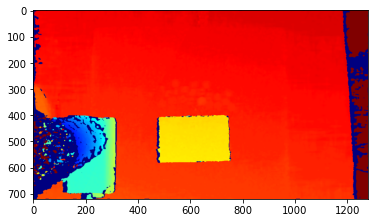

In [21]:
# 将深度图转换为彩图，进行可视化
# 可以指定最近距离跟最远距离, 单位mm
# 注: 根据实际的视场调整这里面的min_distance跟max_distance
canvas = camera.depth_img2canvas(depth_img, min_distance=200, max_distance=500)
plt.imshow(canvas[:, :, ::-1])

# 保存图像
plt.savefig("data/read_depth_image/canvas.png")

## 保存深度图

保存深度图

In [22]:
# 深度图像保存路径
depth_img_path = "data/read_depth_image/demo.npy"
# 以二进制格式保存Numpy对象
np.save(depth_img_path, depth_img)

## 读取深度图

In [23]:
# 深度图像保存路径
depth_img_path = "data/read_depth_image/demo.npy"
# 图像保存
depth_img2 = np.load(depth_img_path)

if depth_img2 is None:
    print("深度图读取失败")
else:
    print("深度图读取成功")

深度图读取成功


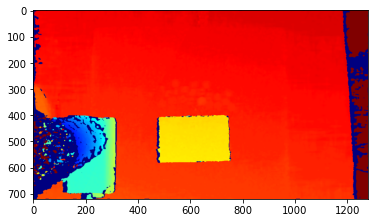

In [24]:
# 将深度图转换为彩图，进行可视化
canvas = camera.depth_img2canvas(depth_img2, min_distance=200, max_distance=500)
plt.imshow(canvas[:, :, ::-1])